
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of total cases](#prediction_total_cases)
* [Prediction of total deaths](#prediction_total_deaths)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
print('File downloaded!')
file_name=('WHO-COVID-19-global-data.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
os.remove("WHO-COVID-19-global-data.csv")
print("File Removed!")

File downloaded!
File copied to DataFrame!
File Removed!


2020-12-13 22:25:04 URL:https://covid19.who.int/WHO-COVID-19-global-data.csv [3470717/3470717] -> "WHO-COVID-19-global-data.csv" [1]


In [3]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


#### Removing data from all the countries except Greece

In [4]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28026,2020-01-03,GR,Greece,EURO,0,0,0,0
28027,2020-01-04,GR,Greece,EURO,0,0,0,0
28028,2020-01-05,GR,Greece,EURO,0,0,0,0
28029,2020-01-06,GR,Greece,EURO,0,0,0,0
28030,2020-01-07,GR,Greece,EURO,0,0,0,0


#### Removing unnecessary data columns

In [5]:
df_raw=df_raw.drop(columns=["Country_code", "WHO_region", "Country"])
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28026,2020-01-03,0,0,0,0
28027,2020-01-04,0,0,0,0
28028,2020-01-05,0,0,0,0
28029,2020-01-06,0,0,0,0
28030,2020-01-07,0,0,0,0


#### Renaming columns

In [6]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28026,2020-01-03,0,0,0,0
28027,2020-01-04,0,0,0,0
28028,2020-01-05,0,0,0,0
28029,2020-01-06,0,0,0,0
28030,2020-01-07,0,0,0,0


#### Sorting the dataframe by Date

In [7]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28371,2020-12-13,1194,123842,68,3540
28370,2020-12-12,1395,122648,102,3472
28369,2020-12-11,1533,121253,81,3370
28368,2020-12-10,1675,119720,95,3289
28367,2020-12-09,1324,118045,102,3194


#### Converting 'Date_reported' to datetime

In [8]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [9]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28371,2020-12-13,1194,123842,68,3540
28370,2020-12-12,1395,122648,102,3472
28369,2020-12-11,1533,121253,81,3370
28368,2020-12-10,1675,119720,95,3289
28367,2020-12-09,1324,118045,102,3194
28366,2020-12-08,1250,116721,89,3092
28365,2020-12-07,903,115471,101,3003
28364,2020-12-06,1383,114568,98,2902
28363,2020-12-05,1648,113185,98,2804
28362,2020-12-04,1882,111537,100,2706


#### Correcting the deviation of the day

In [10]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28371,2020-12-12,1194,123842,68,3540
28370,2020-12-11,1395,122648,102,3472
28369,2020-12-10,1533,121253,81,3370
28368,2020-12-09,1675,119720,95,3289
28367,2020-12-08,1324,118045,102,3194


In [11]:
df_copy = df_copy.iloc[:-310]

In [12]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)

In [13]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28336,2020-11-07,2555,54809,34,749
28337,2020-11-08,1889,56698,35,784
28338,2020-11-09,1489,58187,41,825
28339,2020-11-10,2383,60570,41,866
28340,2020-11-11,2751,63321,43,909
28341,2020-11-12,3316,66637,50,959
28342,2020-11-13,3038,69675,38,997
28343,2020-11-14,2835,72510,38,1035
28344,2020-11-15,1695,74205,71,1106
28345,2020-11-16,2198,76403,59,1165


# New cases graph<a name="new_cases_graph"></a>

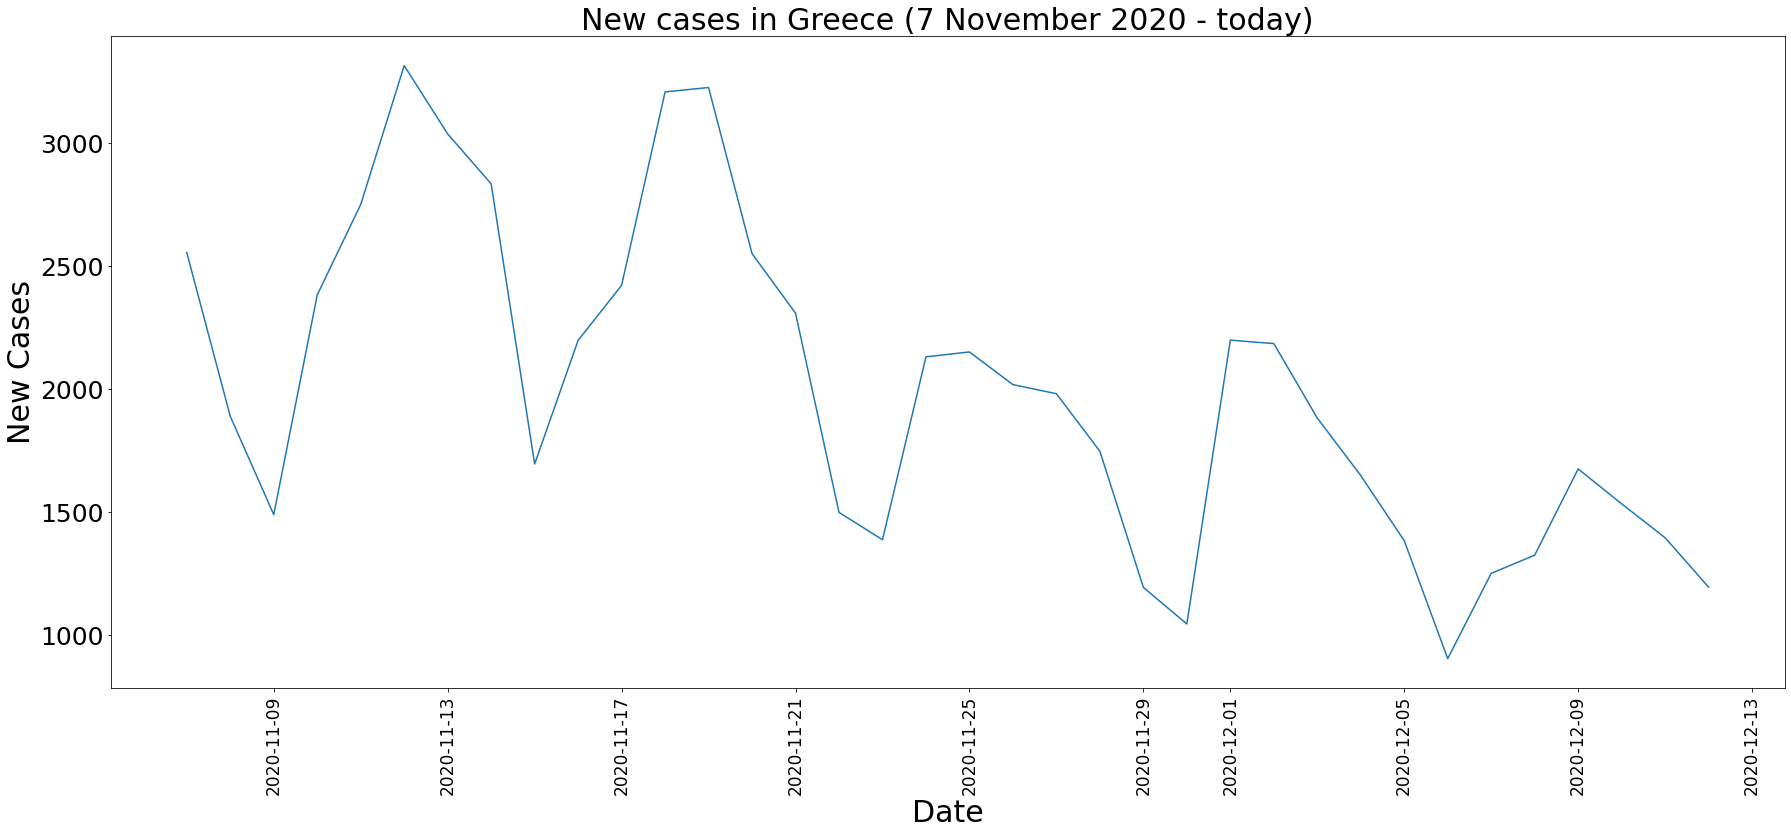

In [14]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (7 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

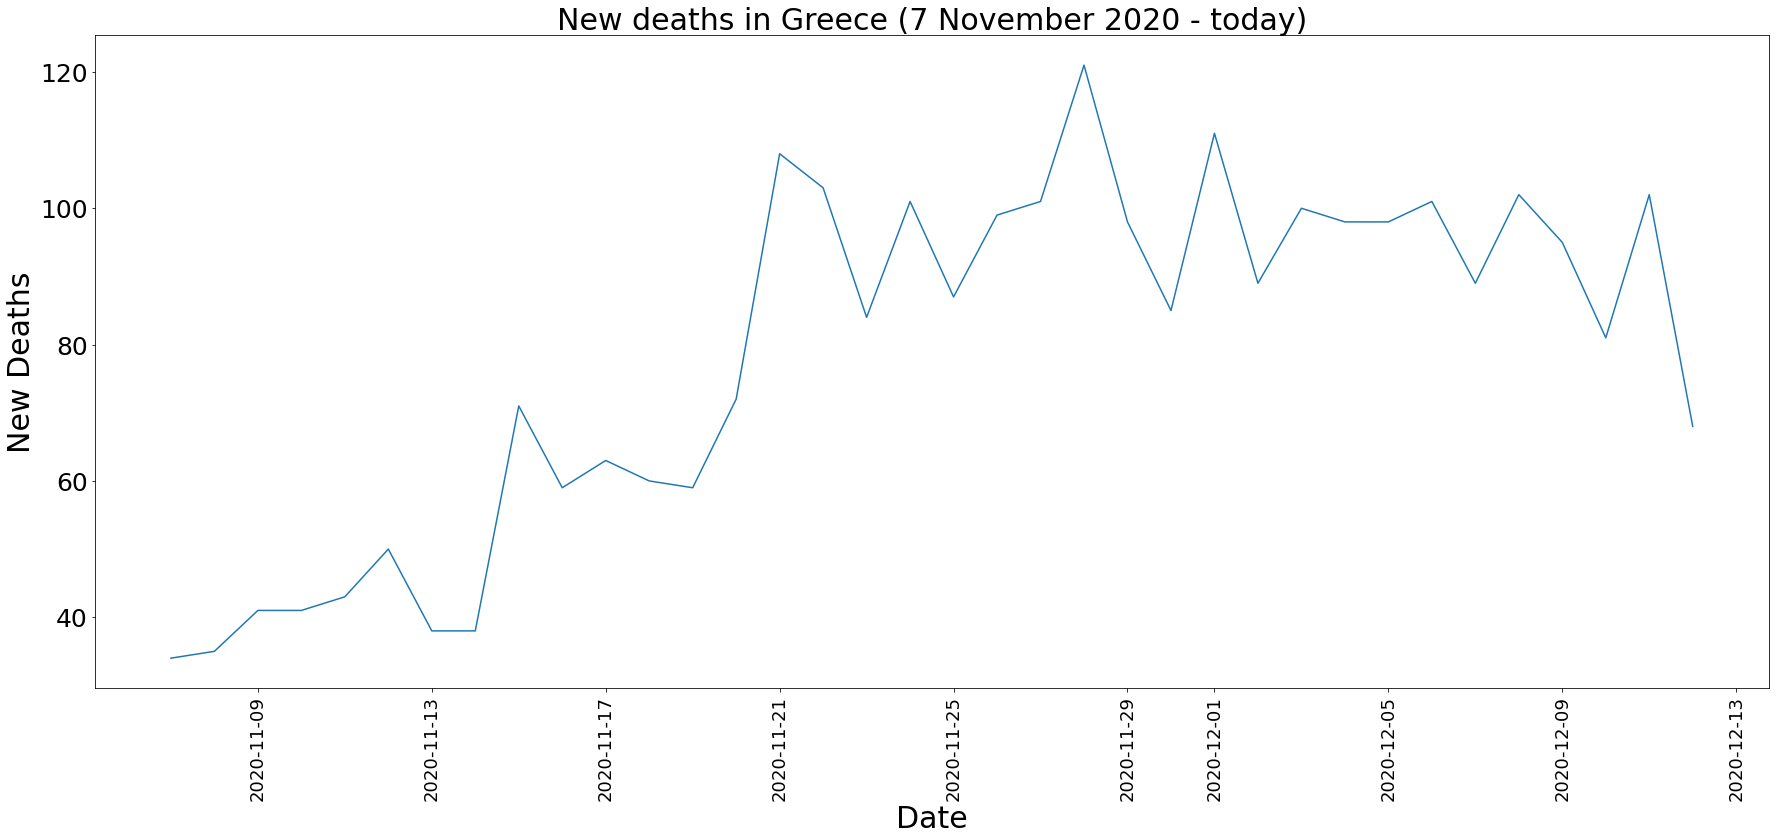

In [15]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

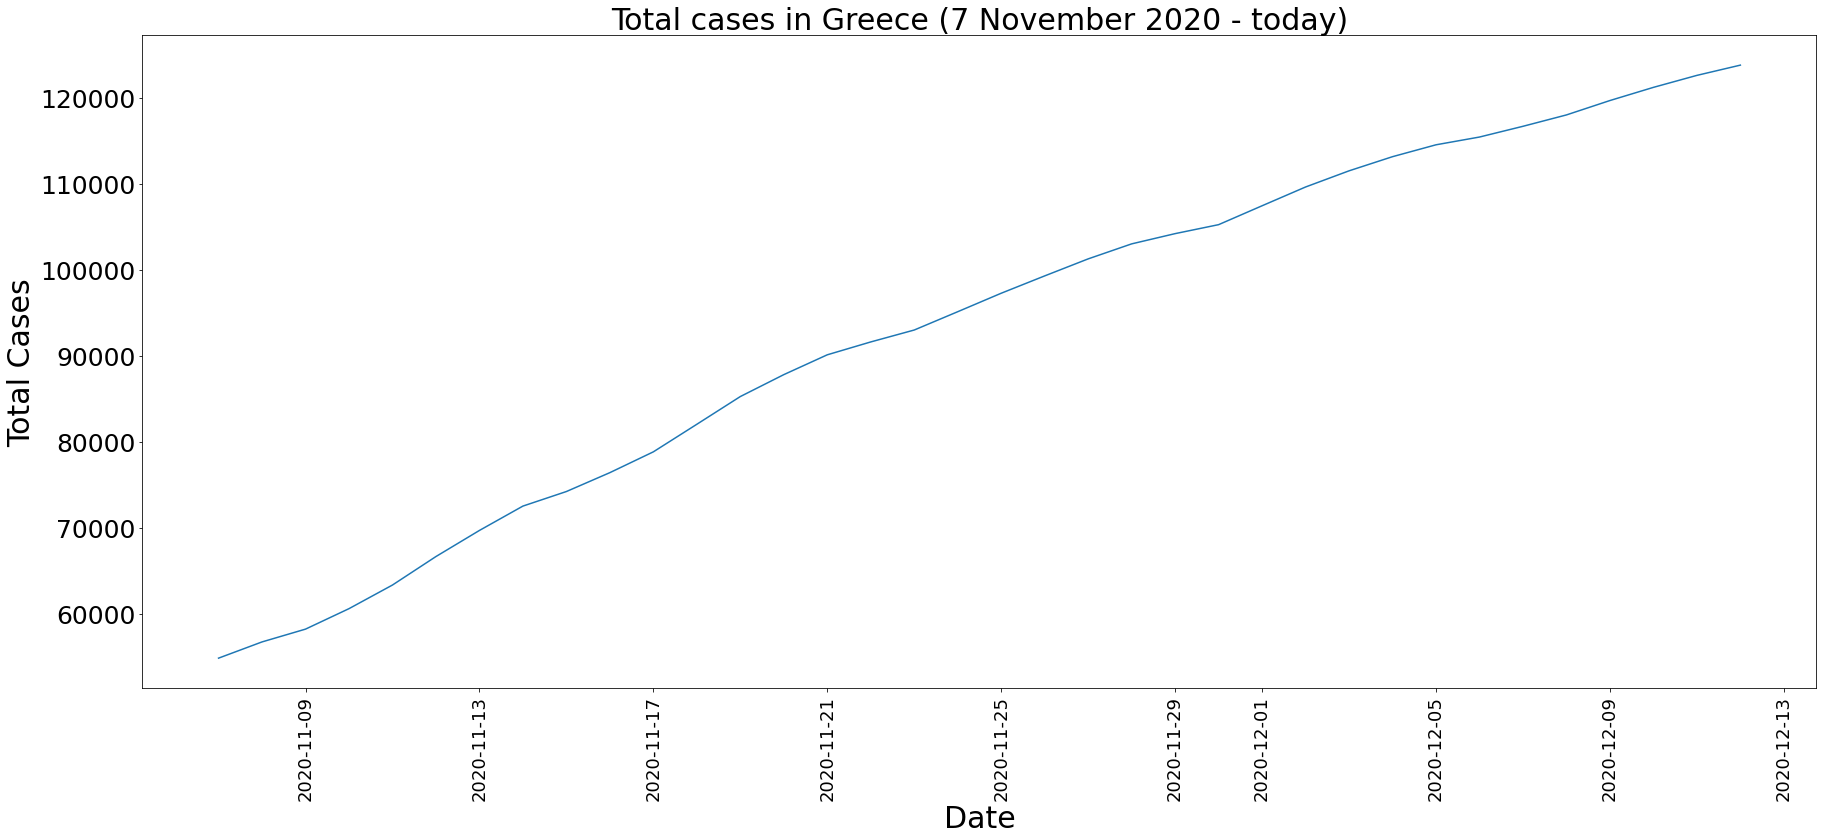

In [16]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

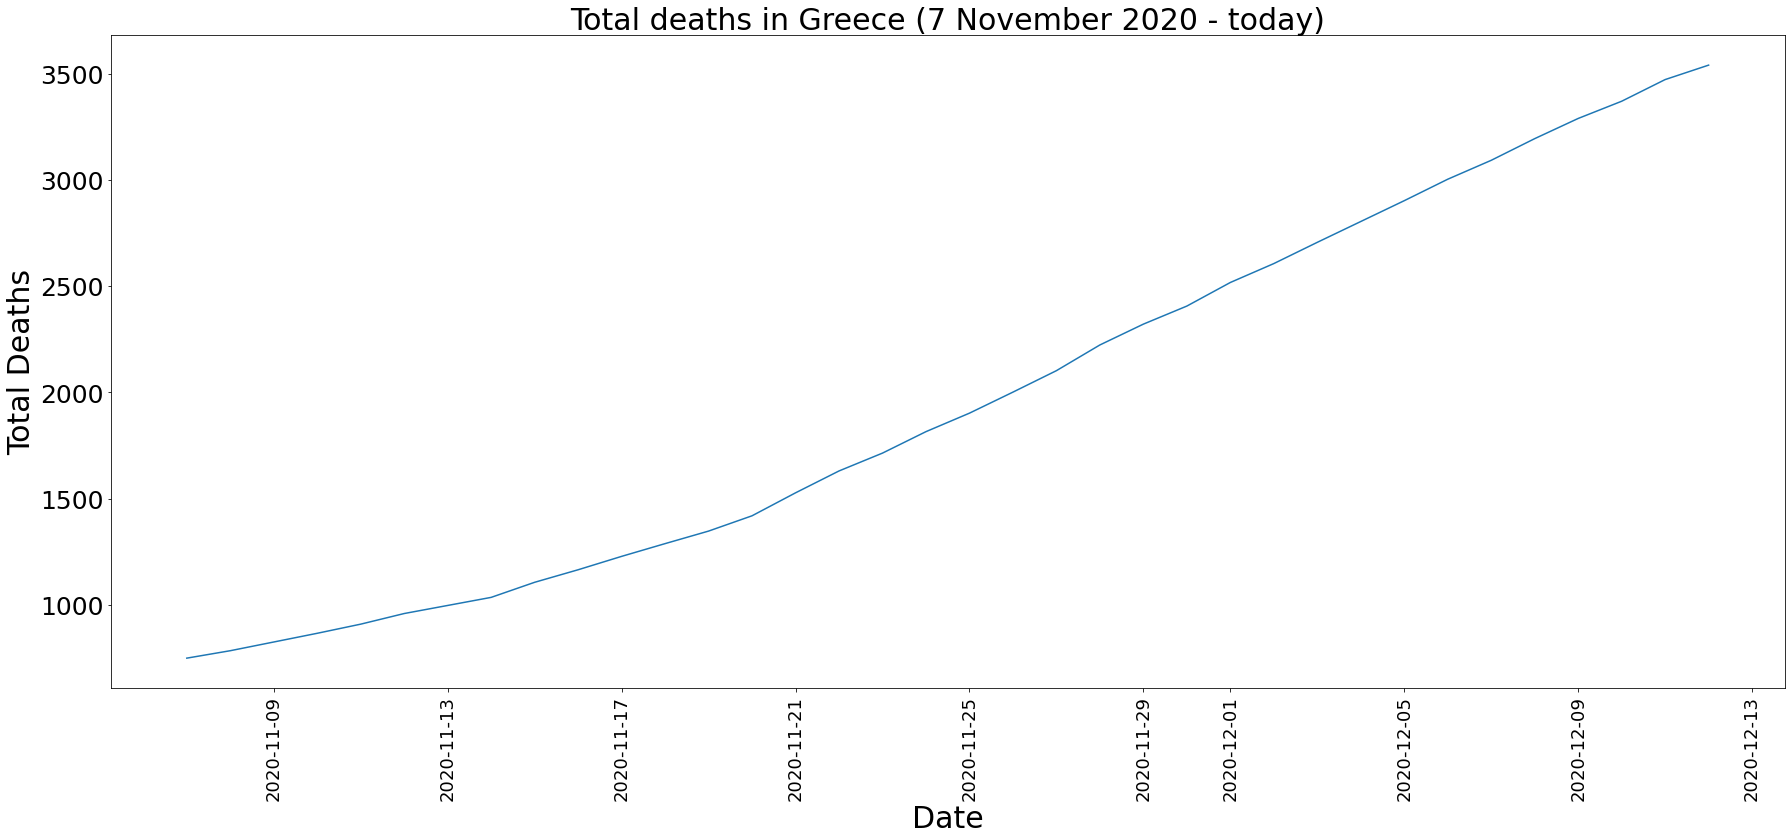

In [17]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [18]:
from fbprophet import Prophet

In [19]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
total_cases=df_copy.groupby('Date_reported').sum()['Total_cases'].reset_index()
total_deaths=df_copy.groupby('Date_reported').sum()['Total_deaths'].reset_index()

## Prediction of Total Cases<a name="prediction_total_cases"></a>

In [20]:
total_cases.tail()

,Date_reported,Total_cases
31,2020-12-08,118045
32,2020-12-09,119720
33,2020-12-10,121253
34,2020-12-11,122648
35,2020-12-12,123842


In [21]:
total_cases.columns=['ds','y']

In [22]:
m=Prophet(interval_width=0.95)
m.fit(total_cases)
future_total_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
forecast_total_cases=m.predict(future_total_cases)
forecast_total_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
36,2020-12-13,124902.871512,124577.818557,125192.247961
37,2020-12-14,125890.053657,125044.676431,126704.522844
38,2020-12-15,127395.722316,125888.927769,128892.563948
39,2020-12-16,129037.738994,126781.326703,131278.506966


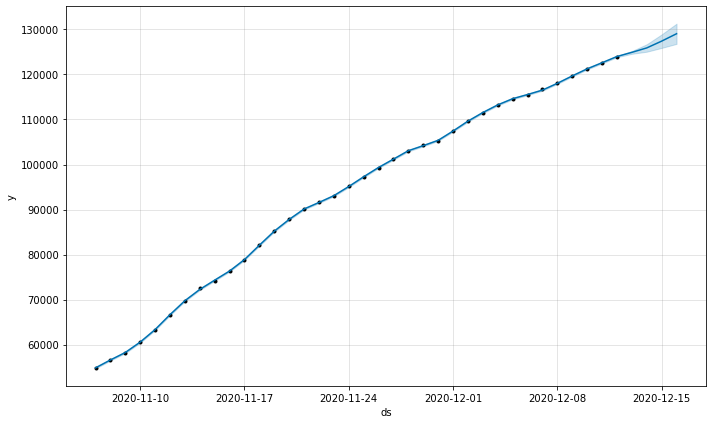

In [24]:
forecast_total_cases_plot=m.plot(forecast_total_cases)

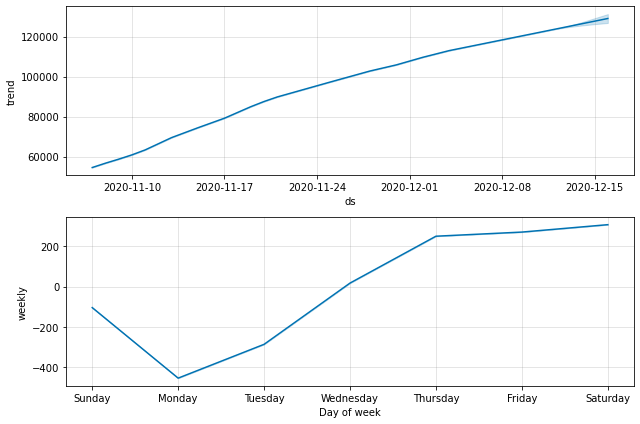

In [25]:
forecast_total_cases_plot=m.plot_components(forecast_total_cases)

## Prediction of total deaths<a name="prediction_total_deaths"></a>

In [26]:
total_deaths.tail()

,Date_reported,Total_deaths
31,2020-12-08,3194
32,2020-12-09,3289
33,2020-12-10,3370
34,2020-12-11,3472
35,2020-12-12,3540


In [27]:
total_deaths.columns=['ds','y']

In [28]:
m=Prophet(interval_width=0.95)
m.fit(total_deaths)
future_total_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forecast_total_deaths=m.predict(future_total_deaths)
forecast_total_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
36,2020-12-13,3660.970251,3649.138592,3672.879300
37,2020-12-14,3748.469490,3731.430144,3764.932123
38,2020-12-15,3847.960832,3823.727325,3874.834694
39,2020-12-16,3937.226279,3901.749350,3976.912221


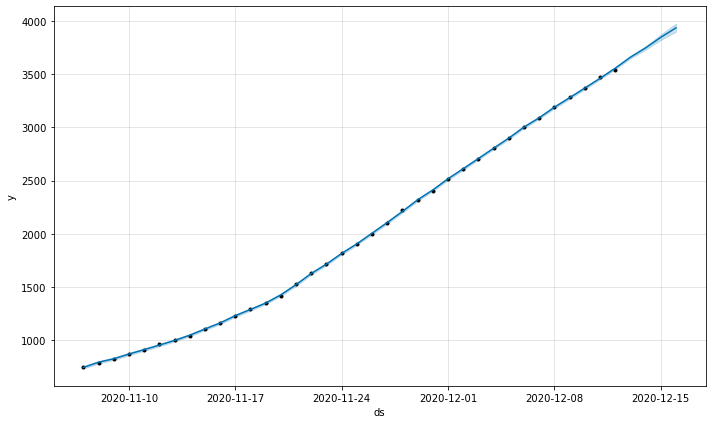

In [30]:
forecast_total_deaths_plot=m.plot(forecast_total_deaths)

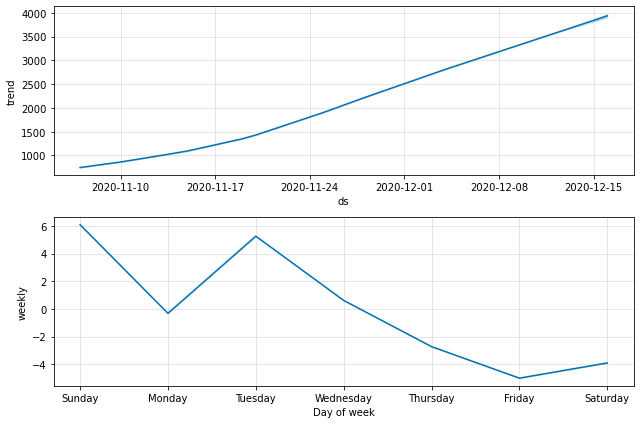

In [31]:
forecast_total_deaths_plot=m.plot_components(forecast_total_deaths)

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [32]:
new_deaths.tail()

,Date_reported,New_deaths
31,2020-12-08,102
32,2020-12-09,95
33,2020-12-10,81
34,2020-12-11,102
35,2020-12-12,68


In [33]:
new_deaths.columns=['ds','y']

In [34]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
36,2020-12-13,121.152522,87.264457,151.016362
37,2020-12-14,111.151089,78.353815,144.555319
38,2020-12-15,123.148387,90.204075,155.755821
39,2020-12-16,114.346904,85.874979,145.223100


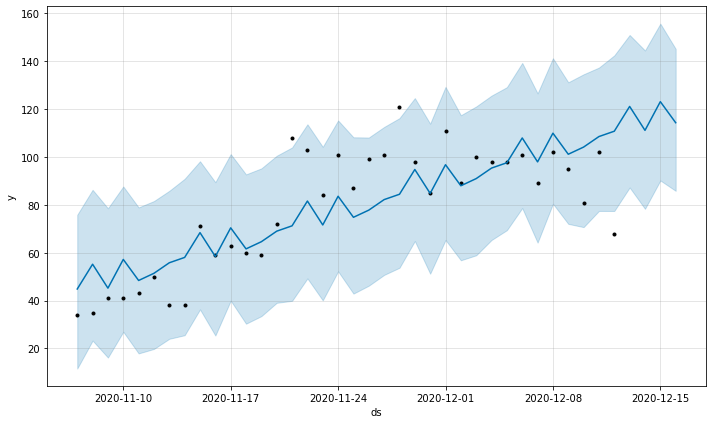

In [36]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

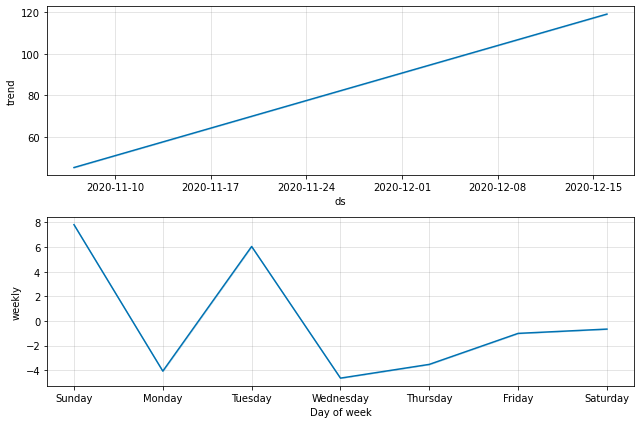

In [37]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [38]:
new_cases.tail()

,Date_reported,New_cases
31,2020-12-08,1324
32,2020-12-09,1675
33,2020-12-10,1533
34,2020-12-11,1395
35,2020-12-12,1194


In [39]:
new_cases.columns=['ds','y']

In [40]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
36,2020-12-13,483.615920,-76.467320,955.729623
37,2020-12-14,521.562491,43.719301,1021.890802
38,2020-12-15,1139.556768,664.305182,1665.818084
39,2020-12-16,1441.835962,915.394544,1944.790775


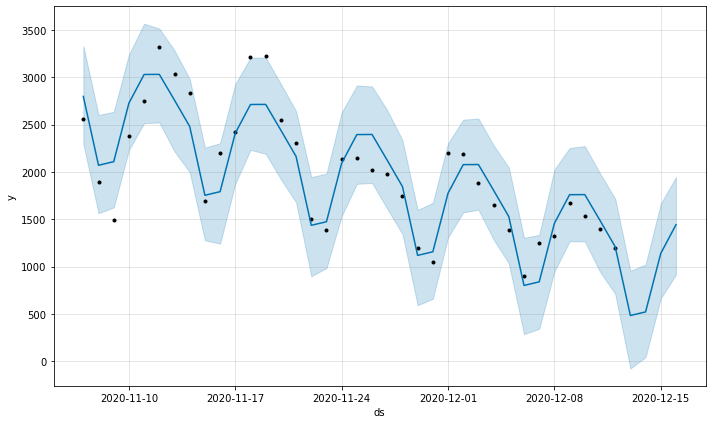

In [42]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

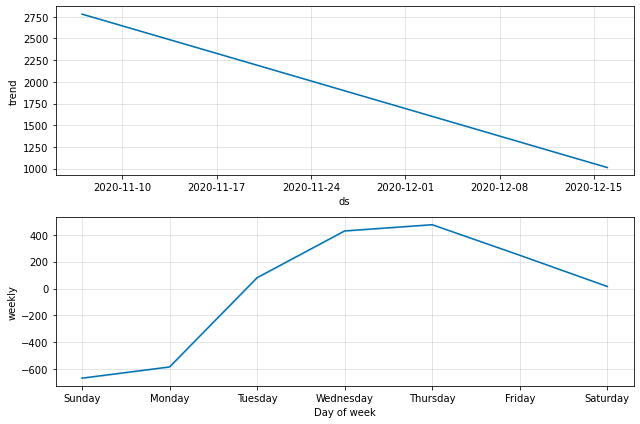

In [43]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)